In [1]:
import pandas as pd
from sklearn.datasets import load_wine
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as split

from sklearn.svm import SVC #model I will train
from sklearn.model_selection import StratifiedKFold # for splitting the training-validation data
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as accuracy

# Overview

<p>L'obiettivo del seguente progetto è quello di effettuare un'analisi predittiva, su un dataset si vini al fine di riconoscerne il produttore, che sarà la nostra variabile target.</p>

<p>Il dataset preso in esame è stato estratto dalla libreria sklearn ed è il risultato di un'analisi chimica di vini coltivati ​​nella stessa regione d'Italia da tre diversi vinicoltori.
</p>

fonte: https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-recognition-dataset

In [2]:
#load dataset
wine_data = load_wine()

In [3]:
#create dataframe pandas by wine_data dataset
wine_df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
wine_df['target'] = wine_data.target

## Data Exploration

In [4]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [5]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [6]:
#controllo se ci sono righe duplicate
wine_df.duplicated().sum()

0

In [7]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [8]:
wine_df.target.unique()

array([0, 1, 2])

In [9]:
#distribuzione per classe di vino
np.bincount(wine_df.target)

array([59, 71, 48])

<p>Viene verificato qual è la correlazione tra le singole feature e mostrato il risultato tramite heatmap.</p>

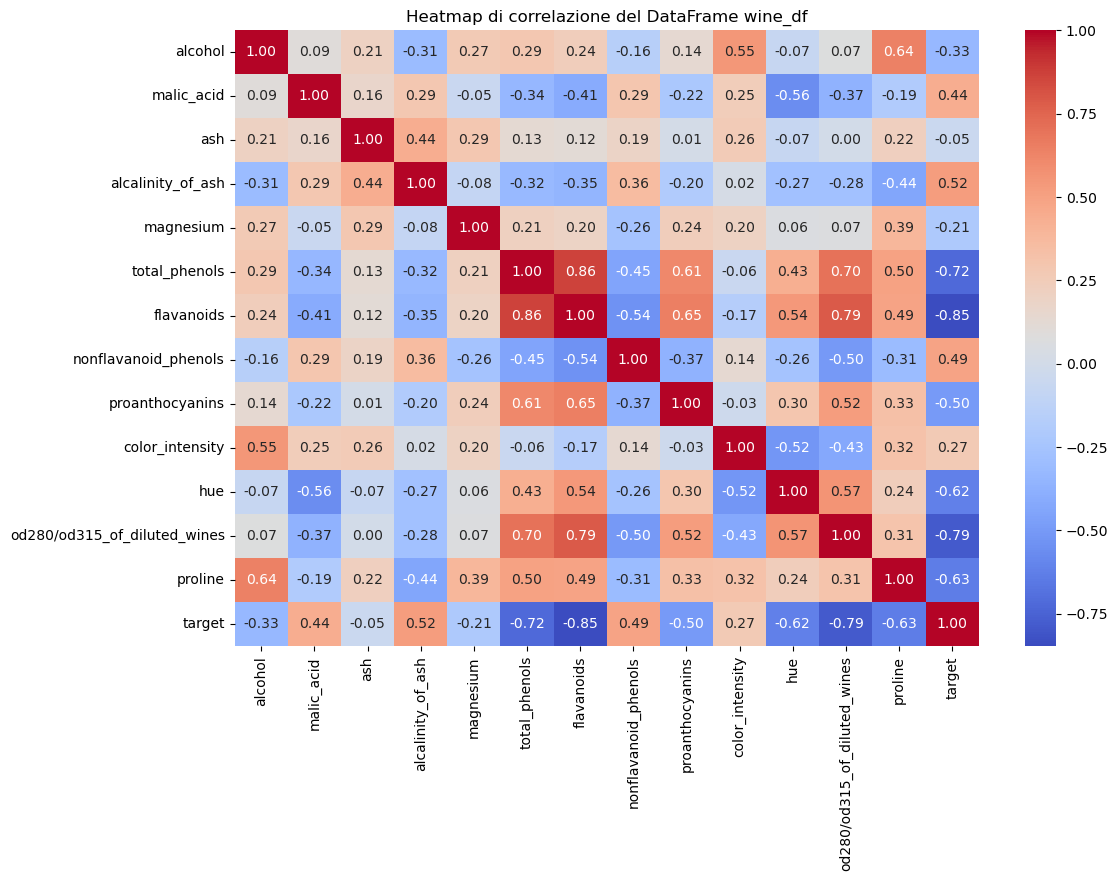

In [10]:
corr = wine_df.corr()

# Creazione della heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Heatmap di correlazione del DataFrame wine_df')
plt.show()

<p>Viene mostrato il pairplot per mettere in evidenza le relazioni tra le variabili prese a coppie.</p>

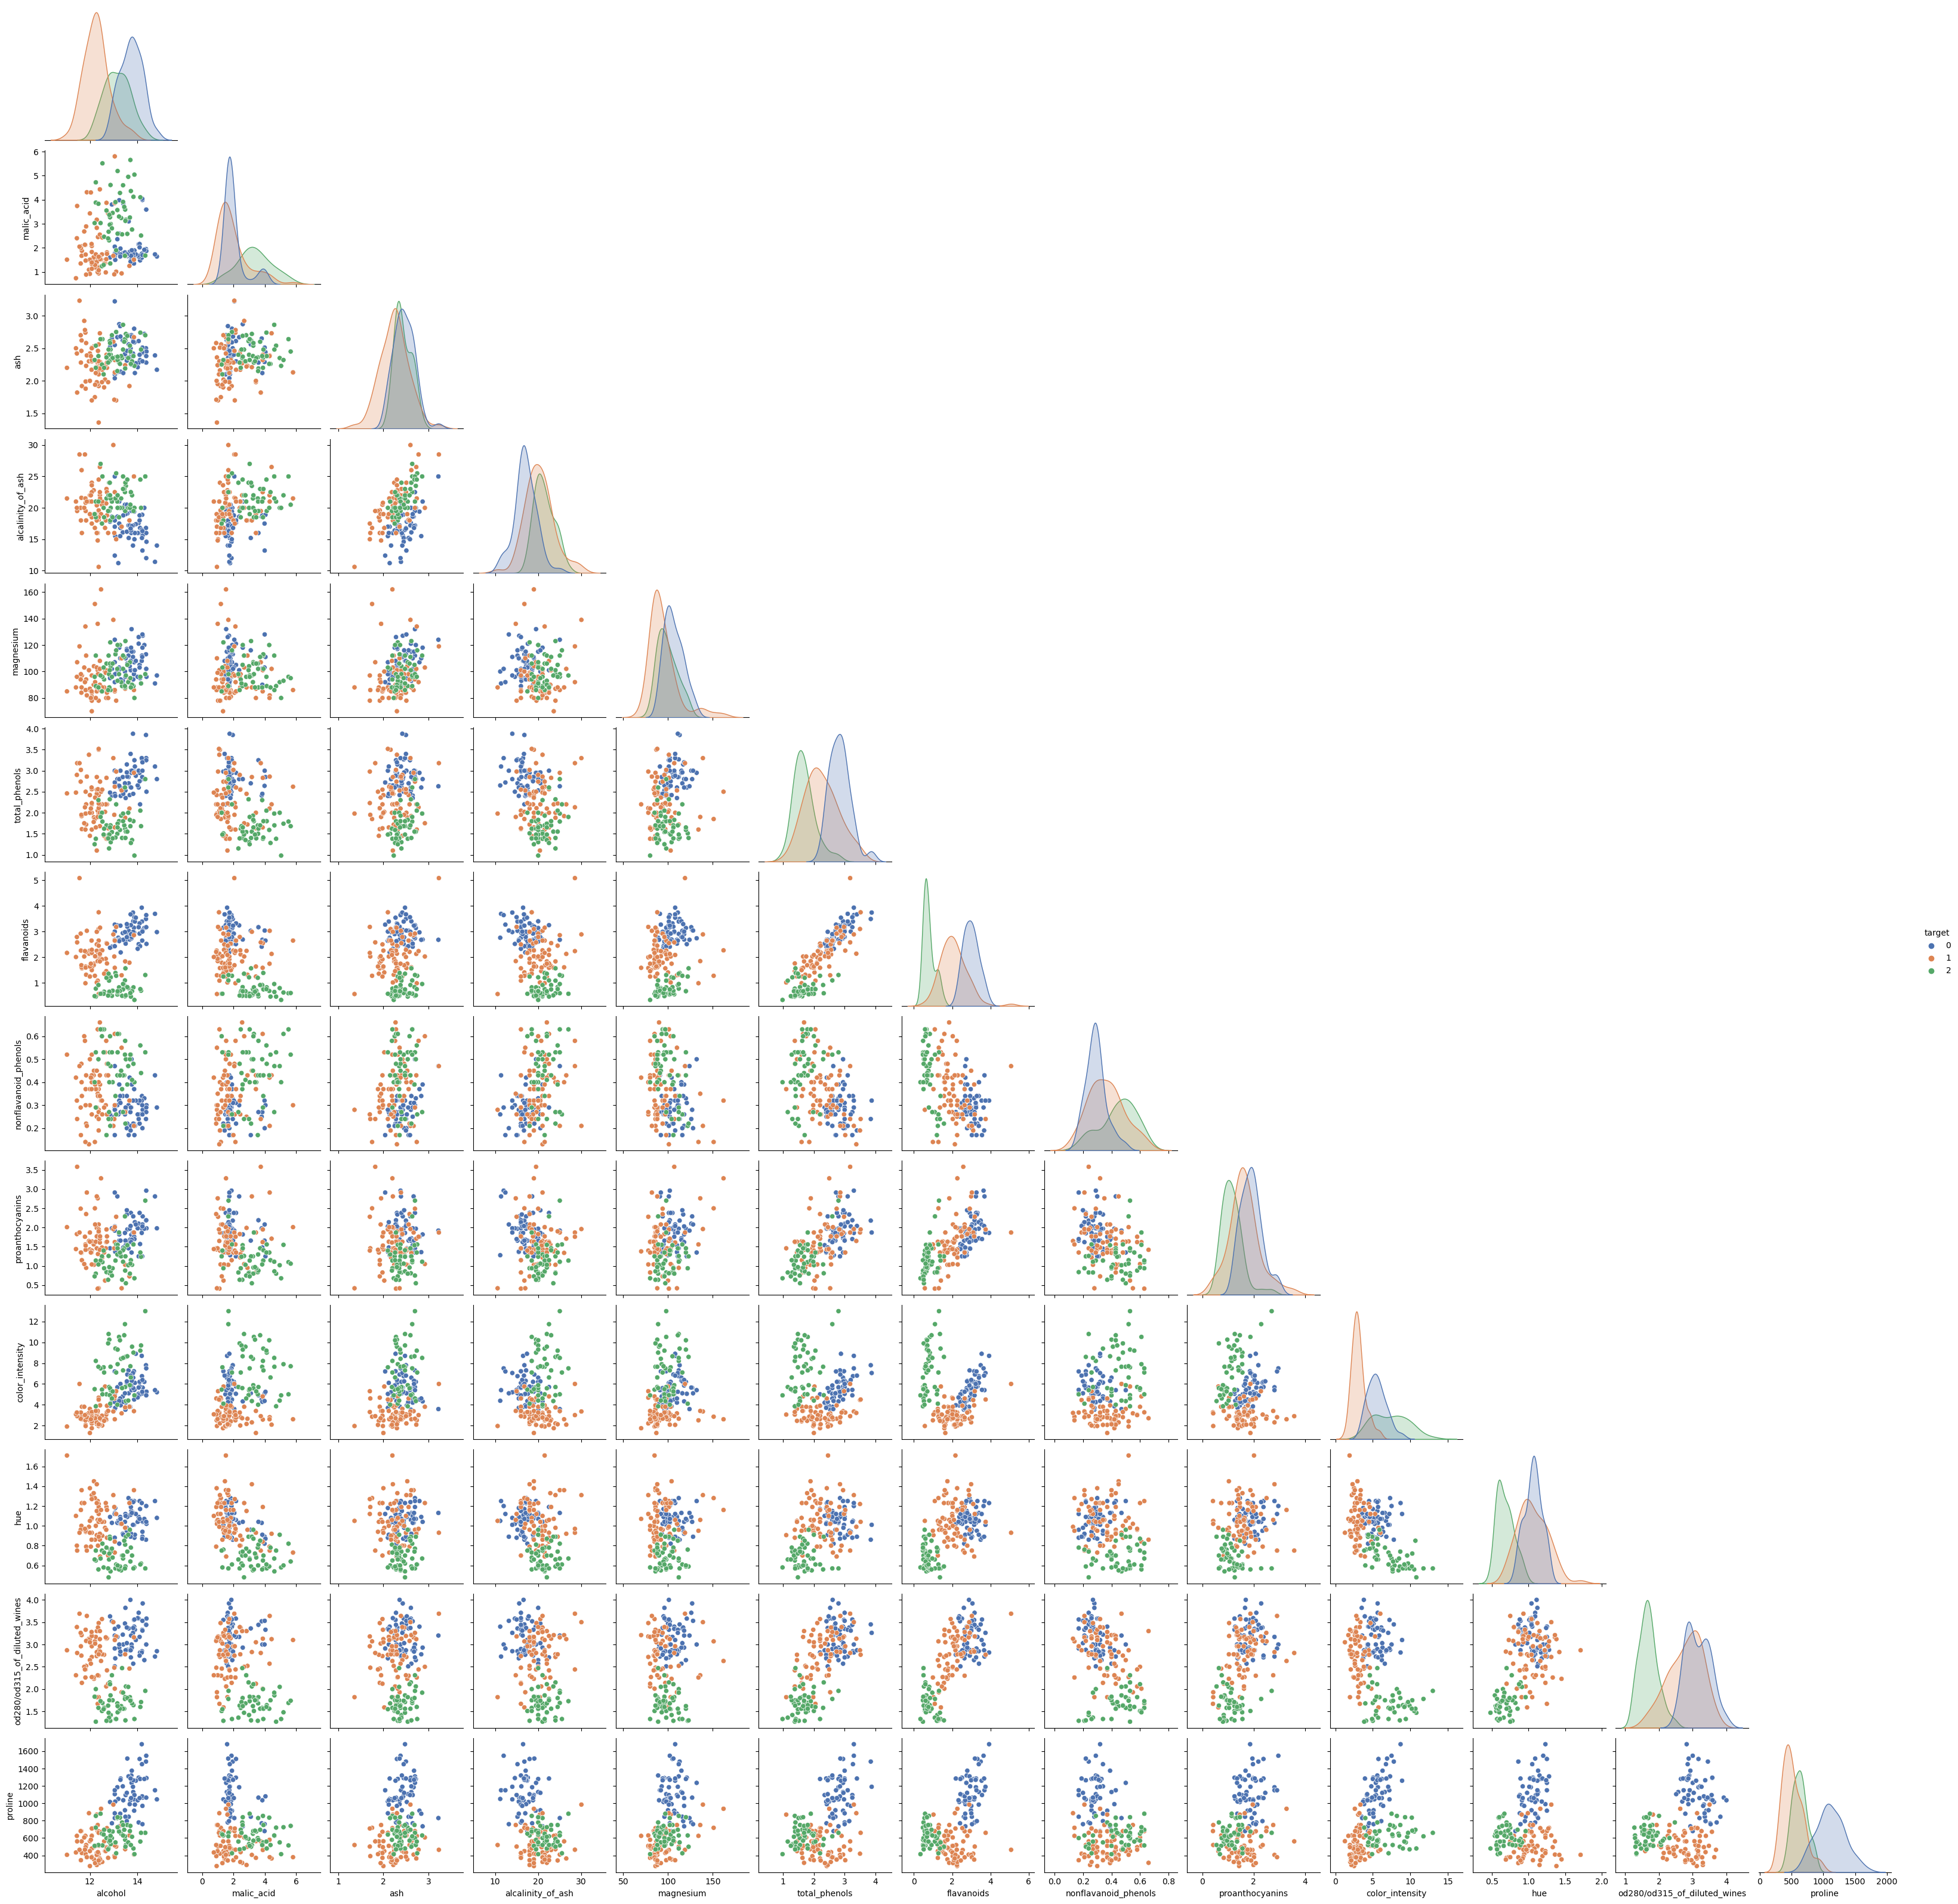

In [11]:
sns.pairplot(wine_df, hue='target', palette="deep", corner=True)

plt.show()

## Fase di addestramento del modello SVM

In [12]:
wine_df.describe().loc[['min', 'max']].T

,min,max
alcohol,11.03,14.83
malic_acid,0.74,5.80
ash,1.36,3.23
alcalinity_of_ash,10.60,30.00
magnesium,70.00,162.00
total_phenols,0.98,3.88
flavanoids,0.34,5.08
nonflavanoid_phenols,0.13,0.66
proanthocyanins,0.41,3.58
color_intensity,1.28,13.00


In [13]:
#Vengono separate il target e le feature e creato il dataset di training e quello di test
y = wine_df.target
X = wine_df.drop(columns=wine_df.columns[-1])

X_train, X_test, y_train, y_test = split(X, y, test_size=0.3, shuffle=True, random_state=0, stratify=y)

In [15]:
#vengono normalizzati i dati portandoli in una scala [0,1]
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

## SVM - validazione degli iperparametri e model fitting</h2>

In [16]:
# Define a cross-validation strategy using StratifiedKFold
crossval = StratifiedKFold(n_splits=5, shuffle=True, random_state=0) 

parameters = [
               {"kernel": ["linear"], "C": [0.01, 0.1, 1, 10, 100]},
               {"kernel": ["rbf"], "C": [0.01, 0.1, 1, 10, 100], "gamma": [0.01, 0.1, 1, 10, 100]},
               {"kernel": ["poly"], "C": [0.01, 0.1, 1, 10, 100], "degree": np.arange(1,5,1)}
              ]

#Usiamo un modello di classificazione perché l'obiettivo è trovare la 'classe' di appartenza del vino, tra la classe [1, 2, 3]
model = SVC()
#Create a GridSearchCV object to search for optimal parameters for the SVC() model
clf = GridSearchCV(estimator= model, param_grid=parameters, cv=crossval, verbose=1 , n_jobs=-1)

# Fit the GridSearchCV object to the training data
clf.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear']},
                         {'C': [0.01, 0.1, 1, 10, 100],
                          'gamma': [0.01, 0.1, 1, 10, 100], 'kernel': ['rbf']},
                         {'C': [0.01, 0.1, 1, 10, 100],
                          'degree': array([1, 2, 3, 4]), 'kernel': ['poly']}],
             verbose=1)

In [17]:
#creaiamo un dataframe per valutare quali parametri in fase di addestramento hanno dato le migliori performance
scores = pd.DataFrame(clf.cv_results_)
scores = scores.sort_values(by="rank_test_score").set_index("rank_test_score")
int_cols = ["param_C", "param_kernel", "param_degree", "param_gamma", "mean_test_score"]
scores[int_cols].head()

,param_C,param_kernel,param_degree,param_gamma,mean_test_score
rank_test_score,,,,,
1,0.1,poly,1,NaN,0.967667
1,0.01,poly,4,NaN,0.967667
3,0.1,linear,NaN,NaN,0.959667
3,0.1,rbf,NaN,1,0.959667
5,1,linear,NaN,NaN,0.959333


In [18]:
#Print the best parameters found during the grid search
print("Parametri migliori:", clf.best_params_)

Parametri migliori: {'C': 0.01, 'degree': 4, 'kernel': 'poly'}


## Prediction e valutazione delle performance del modello

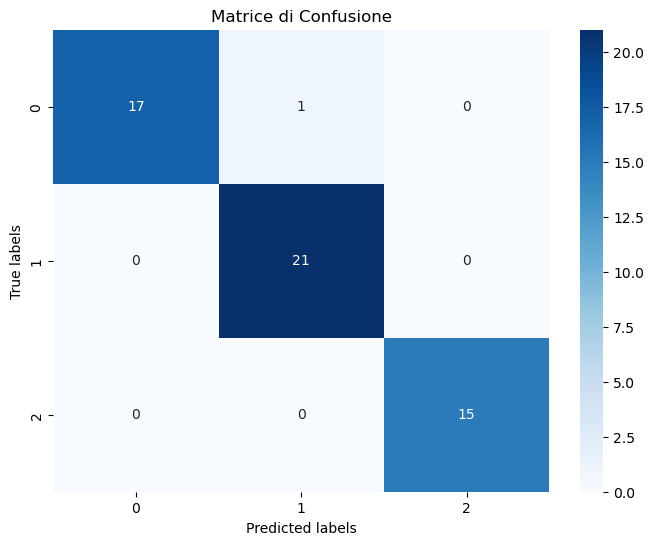

In [19]:
y_pred = clf.predict(X_test)

# Calculation of the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Confusion matrix visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Matrice di Confusione')
plt.show()

In [20]:
# Obtain the best fitted model from the GridSearchCV object 'clf'
fitted_model = clf.best_estimator_

predictions = fitted_model.predict(X_test)

# Calculate the accuracy of the predictions using a custom 'accuracy' function
round(accuracy(y_test, predictions), 4)

0.9815